In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import numpy as np


In [36]:
file_path = r'R:\Python\reddit\reddit_conterversy_analyser\dataset.csv'
df = pd.read_csv(file_path)
df.head()
df.isnull().sum()

subreddit            0
title                0
selftext             0
score                0
upvote_ratio         0
num_comments         0
controversy_score    0
post_url             0
permalink            0
dtype: int64

In [37]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   subreddit          2976 non-null   object 
 1   title              2976 non-null   object 
 2   selftext           2976 non-null   object 
 3   score              2976 non-null   int64  
 4   upvote_ratio       2976 non-null   float64
 5   num_comments       2976 non-null   int64  
 6   controversy_score  2976 non-null   float64
 7   post_url           2976 non-null   object 
 8   permalink          2976 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 209.4+ KB


In [38]:
df.describe()
"""
df['subreddit'].value_counts()
df.sort_values(by='controversy_score', ascending=False).head(10)"""

"\ndf['subreddit'].value_counts()\ndf.sort_values(by='controversy_score', ascending=False).head(10)"

In [39]:
df.head()

,subreddit,title,selftext,score,upvote_ratio,num_comments,controversy_score,post_url,permalink
0,politics,Megathread: Joe Biden Projected to Defeat Pres...,Former Vice President Joseph Biden has secured...,214316,0.88,81189,0.0455,https://www.reddit.com/r/politics/comments/jpt...,https://www.reddit.com/r/politics/comments/jpt...
1,politics,Megathread: House Votes to Impeach President D...,The United States House of Representatives has...,147731,0.89,50709,0.0378,https://www.reddit.com/r/politics/comments/ecm...,https://www.reddit.com/r/politics/comments/ecm...
2,politics,Megathread: House Votes to Impeach President D...,The U.S. House of Representatives voted today ...,116237,0.87,31338,0.0350,https://www.reddit.com/r/politics/comments/kwq...,https://www.reddit.com/r/politics/comments/kwq...
3,politics,Megathread: Joseph R. Biden Sworn in as the 46...,Joe Biden became the 46th President of the Uni...,112128,0.81,27789,0.0471,https://www.reddit.com/r/politics/comments/l1d...,https://www.reddit.com/r/politics/comments/l1d...
4,politics,Megathread: President Trump Pressures Georgia ...,President Trump urged fellow Republican Brad R...,111270,0.88,23033,0.0248,https://www.reddit.com/r/politics/comments/kpr...,https://www.reddit.com/r/politics/comments/kpr...


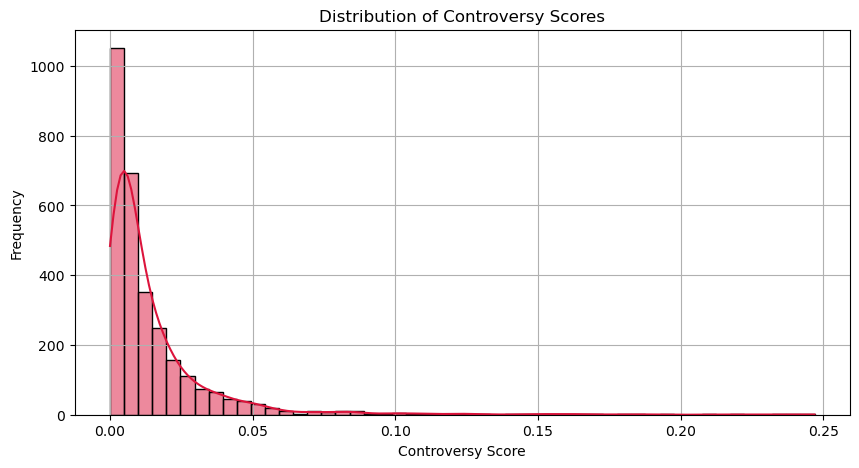

In [41]:

plt.figure(figsize=(10, 5))
sns.histplot(df['controversy_score'], bins=50, kde=True, color='crimson')
plt.title('Distribution of Controversy Scores')
plt.xlabel('Controversy Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


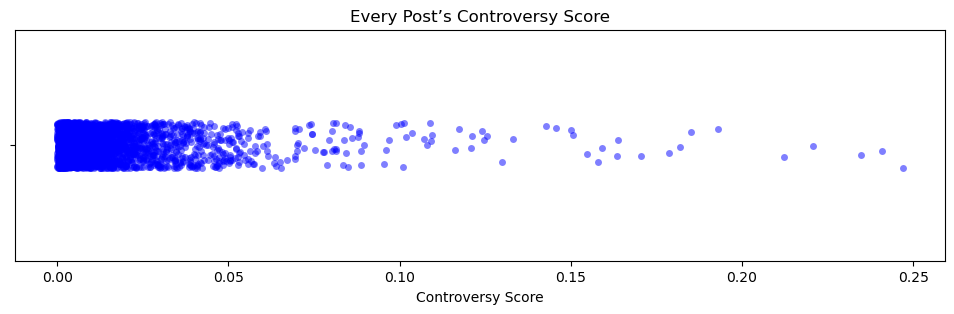

In [43]:
plt.figure(figsize=(12, 3))
sns.stripplot(x='controversy_score', data=df, color='blue', alpha=0.5)
plt.title('Every Post’s Controversy Score')
plt.xlabel('Controversy Score')
plt.show()


In [44]:
print(df['controversy_score'].min())
df['controversy_score'].max()

0.0


0.2469

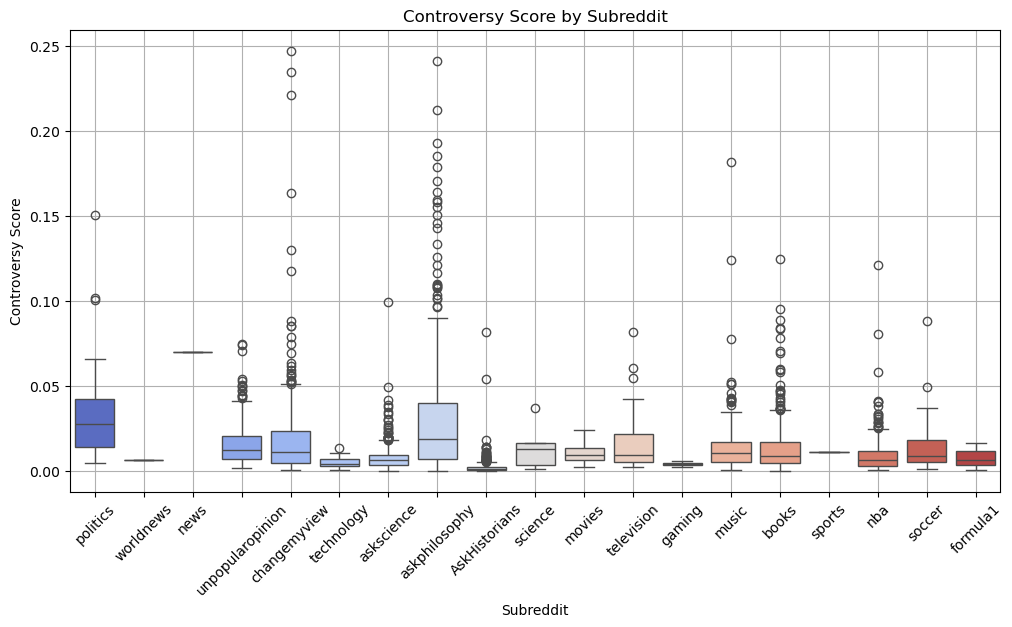

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df,
    x='subreddit',
    y='controversy_score',
    hue='subreddit',       # This avoids the warning
    palette='coolwarm',
    dodge=False,
    legend=False           # You don’t need a legend since x already shows subreddit
)

plt.title('Controversy Score by Subreddit')
plt.xlabel('Subreddit')
plt.ylabel('Controversy Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



C:\Users\ragul\AppData\Local\Temp\ipykernel_736\2365993819.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_scores.index, y=avg_scores.values, palette='magma')


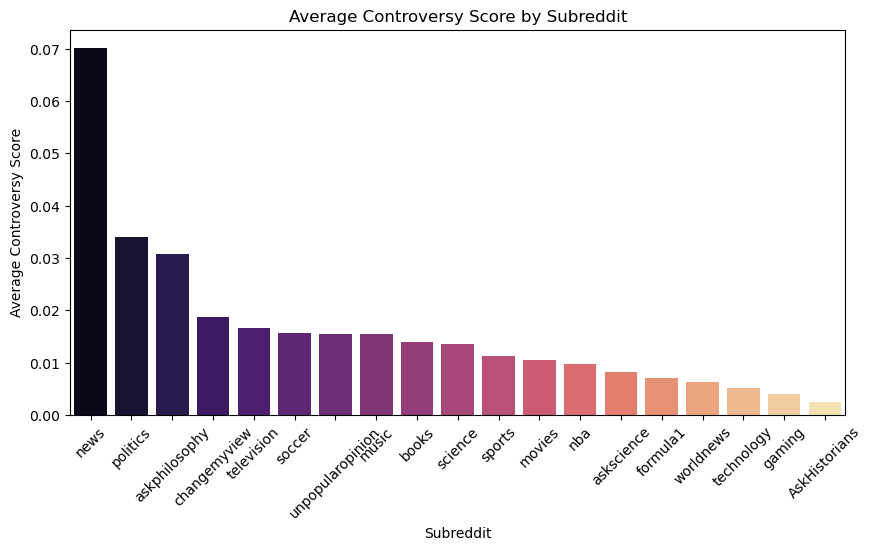

In [46]:
avg_scores = df.groupby('subreddit')['controversy_score'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=avg_scores.index, y=avg_scores.values, palette='magma')
plt.title('Average Controversy Score by Subreddit')
plt.xlabel('Subreddit')
plt.ylabel('Average Controversy Score')
plt.xticks(rotation=45)
plt.show()


In [47]:
df['subreddit'].unique()
print(df.count())

subreddit            2976
title                2976
selftext             2976
score                2976
upvote_ratio         2976
num_comments         2976
controversy_score    2976
post_url             2976
permalink            2976
dtype: int64


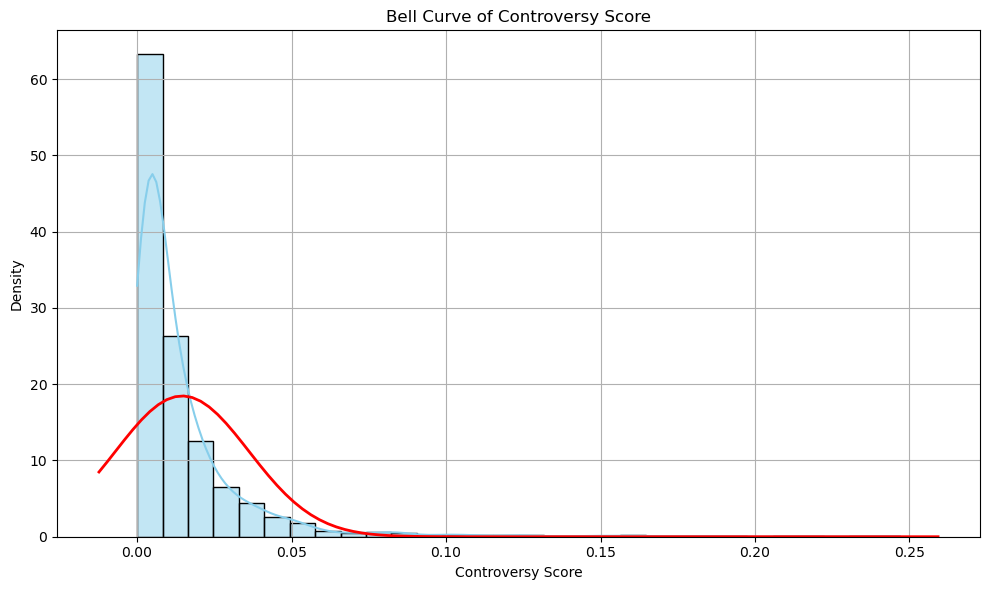

In [52]:
# Set up the plot
plt.figure(figsize=(10, 6))
sns.histplot(df['controversy_score'], bins=30, kde=True, stat='density', color='skyblue', edgecolor='black')

# Add the bell curve (normal distribution curve) on top
mean = df['controversy_score'].mean()
std = df['controversy_score'].std()
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)
plt.plot(x, p, 'r', linewidth=2)

# Labels & title
plt.title('Bell Curve of Controversy Score')
plt.xlabel('Controversy Score')
plt.ylabel('Density')
plt.grid(True)
plt.tight_layout()
plt.show()


In [55]:
df['controversy_score'].mean()

0.014595329301075268

In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [83]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score

# 📥 Load data
df = pd.read_csv("R:/Python/reddit/reddit_conterversy_analyser/dataset.csv")

# 🧠 Preprocess: Combine title + selftext
df_model = df.copy()
df_model['title'] = df_model['title'].astype(str)
df_model['selftext'] = df_model['selftext'].astype(str)
df_model['text'] = df_model['title'] + ' ' + df_model['selftext']

# ❌ Drop rows with missing/empty values
df_model.dropna(subset=['text', 'subreddit', 'controversy_score'], inplace=True)
df_model = df_model[df_model['text'].str.strip() != '']
df_model = df_model[df_model['subreddit'].str.strip() != '']

# ✅ Features and target
X = df_model[['text', 'subreddit']]
y = df_model['controversy_score']

print(f"✅ X shape: {X.shape}, y shape: {y.shape}")

# 📊 Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ✅ Define the preprocessor (note: column names in **lists**)
preprocessor = ColumnTransformer(transformers=[
    ('text', TfidfVectorizer(max_features=1000, stop_words='english'), 'text'),  # keep this as string
    ('subreddit', OneHotEncoder(handle_unknown='ignore'), ['subreddit'])  # wrap in list
])

# 🔁 Pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# 🏋️ Fit model
model.fit(X_train, y_train)

# 🔍 Predict
y_pred = model.predict(X_test)

# 📈 Evaluate
print(f"📉 MSE: {mean_squared_error(y_test, y_pred):.4f}")
print(f"📊 R² Score: {r2_score(y_test, y_pred):.4f}")


✅ X shape: (2976, 2), y shape: (2976,)
📉 MSE: 0.0005
📊 R² Score: 0.0409


In [88]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

# Load the data
df = pd.read_csv("dataset.csv")

# Combine title and selftext into a new 'text' column
df['title'] = df['title'].astype(str)
df['selftext'] = df['selftext'].astype(str)
df['text'] = df['title'] + " " + df['selftext']

# Drop empty or missing rows
df.dropna(subset=['text', 'subreddit', 'controversy_score'], inplace=True)
df = df[df['text'].str.strip() != '']
df = df[df['subreddit'].str.strip() != '']

# Define features and target
X = df[['text', 'subreddit']]  # 2D
y = df['controversy_score']   # 1D

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Transformers (fix is right here with the column names as lists!)
preprocessor = ColumnTransformer(transformers=[
    ('text', TfidfVectorizer(max_features=5000, stop_words='english'), 'text'),
    ('subreddit', OneHotEncoder(handle_unknown='ignore'), ['subreddit'])  # ✅ list used
])

# Define pipeline with XGBoost
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(n_estimators=100, random_state=42, verbosity=0))
])

# Train
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print(f"✅ X shape: {X.shape}, y shape: {y.shape}")
print(f"📉 MSE: {mean_squared_error(y_test, y_pred):.4f}")
print(f"📊 R² Score: {r2_score(y_test, y_pred):.4f}")


✅ X shape: (2976, 2), y shape: (2976,)
📉 MSE: 0.0005
📊 R² Score: 0.1051


In [95]:
def classify_controversy(score):
    if score <= 0.010:
        return "🟢 No controversy"
    elif score <= 0.020:
        return "🟡 Slightly controversial"
    elif score <= 0.030:
        return "🟠 More likely to be controversial"
    else:
        return "🔴 Highly controversial"

def predict_controversy(model, title, selftext, subreddit):
    # Combine input the same way as training
    text_input = f"{title.strip()} {selftext.strip()}"
    input_df = pd.DataFrame({
        'text': [text_input],
        'subreddit': [subreddit]
    })

    # Predict score
    score = model.predict(input_df)[0]

    # Classify
    category = classify_controversy(score)

    print(f"🔍 Predicted controversy score: {score:.4f}")
    print(f"📊 Category: {category}")
    return score, category


In [98]:
# Example input
title = "Megathread: Joe Biden Projected to Defeat President Donald Trump and Win the 2020 US Presidential Election"
selftext = """Former Vice President Joseph Biden has secured the 270 electoral votes necessary to defeat President Donald Trump and become the 46th President of the United States, according to multiple sources.
"""
subreddit = "politics"

# Predict
predict_controversy(model, title, selftext, subreddit)


🔍 Predicted controversy score: 0.0271
📊 Category: 🟠 More likely to be controversial


(0.027107753, '🟠 More likely to be controversial')